### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings


### Importing train dataset

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()  ## It shows first 5 rows information

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Importing test dataset

In [4]:
test=pd.read_csv("test.csv")

In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_original=train.copy()
test_original=test.copy()

### Understanding the train data

In [7]:
train.columns  ## Column shows name of the columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
### In training dataset 12 are independent veriable & one dependent veriable.i.e. Loan_Status in the training dataset.
##We have similar features in the test dataset as the training dataset except for the Loan_Status. 
#We will predict the Loan_Status using the model built using the train data.

In [9]:
train.size  ## Size of the training dataset

7982

In [10]:
train.shape  ## Shape ot the training dataset

(614, 13)

In [11]:
## In training dataset 614 are rows & 13 columns.

In [12]:
train.dtypes    ## It shows datatype of each columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
train.info()   ## Information of the columns are given by using info commnand

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
train.describe()  ## Overall description of each data set is shown by describe function.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
train.min() ## Minimum values are shown here

Loan_ID              LP001002
Education            Graduate
ApplicantIncome           150
CoapplicantIncome           0
LoanAmount                  9
Loan_Amount_Term           12
Credit_History              0
Property_Area           Rural
Loan_Status                 N
dtype: object

In [16]:
train.max()

Loan_ID                  LP002990
Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome           41667
LoanAmount                    700
Loan_Amount_Term              480
Credit_History                  1
Property_Area               Urban
Loan_Status                     Y
dtype: object

In [17]:
train.mean()  ## Mean value shows average of each numerical column

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

### Variance,Kurtosis,std.deviation of train dataset

In [18]:
train.var() ## Variance of each column shown by variance function

ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.325190e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.331362e-01
dtype: float64

In [19]:
train.std()  ## Standered deviation of each column

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [20]:
train.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [21]:
train.kurtosis()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

In [22]:
train.head(50).mean()  ## Mean of 50 rows

ApplicantIncome      4157.200000
CoapplicantIncome    1828.720000
LoanAmount            130.250000
Loan_Amount_Term      352.173913
Credit_History          0.847826
dtype: float64

In [23]:
#Selecting a column
train[['ApplicantIncome']]

,ApplicantIncome
0,5849
1,4583
2,3000
3,2583
4,6000
...,...
609,2900
610,4106
611,8072
612,7583


#### Groupby on the basis of Education

In [24]:
train.groupby(['Education']).mean()  ##Groupby data on the basis of Education.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,5857.433333,1717.474833,154.060215,344.669492,0.857788
Not Graduate,3777.283582,1276.544776,118.409449,332.156250,0.785124


In [25]:
train.groupby('Education')[['ApplicantIncome','CoapplicantIncome']].mean()

,ApplicantIncome,CoapplicantIncome
Education,,
Graduate,5857.433333,1717.474833
Not Graduate,3777.283582,1276.544776


In [26]:
train["Gender"].unique()   

array(['Male', 'Female', nan], dtype=object)

In [27]:
train["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [28]:
train["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [29]:
train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [30]:
train["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

### Understanding test dataset

In [31]:
test.shape

(367, 12)

In [32]:
## There are 367 rows & 12 columns in test datset

In [33]:
test.columns  ## Column shows name of the columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [34]:
test.size  ## Size of the training dataset

4404

In [35]:
test.dtypes    ## It shows datatype of each columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [37]:
test.mean()

ApplicantIncome      4805.599455
CoapplicantIncome    1569.577657
LoanAmount            136.132597
Loan_Amount_Term      342.537396
Credit_History          0.825444
dtype: float64

In [38]:
test.median()

ApplicantIncome      3786.0
CoapplicantIncome    1025.0
LoanAmount            125.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

### Skewness,vairance,std deviation for test dataset

In [39]:
test.var()

ApplicantIncome      2.411483e+07
CoapplicantIncome    5.448639e+06
LoanAmount           3.765866e+03
Loan_Amount_Term     4.245388e+03
Credit_History       1.445139e-01
dtype: float64

In [40]:
test.std()

ApplicantIncome      4910.685399
CoapplicantIncome    2334.232099
LoanAmount             61.366652
Loan_Amount_Term       65.156643
Credit_History          0.380150
dtype: float64

In [41]:
test.kurtosis()

ApplicantIncome      103.127490
CoapplicantIncome     30.191142
LoanAmount             9.407853
Loan_Amount_Term       8.654022
Credit_History         0.972306
dtype: float64

In [42]:
test.skew()

ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.223512
Loan_Amount_Term    -2.679318
Credit_History      -1.722379
dtype: float64

### Duplicate

In [43]:
train[train.duplicated()].shape

(0, 13)

In [44]:
## There is no duplicate value in training dataset 

In [45]:
##Some variables have missing values that we’ll have to deal with ,
#and also there seems to be some outliers for the Applicant Income , Coapplicant income and Loan Amount .
#We also see that about 84% applicants have a credit_history.
#Because the mean of Credit_History field is 0.84 and it has either (1 for having a credit history or 0 for not)

In [46]:
test[test.duplicated()].shape

(0, 12)

In [47]:
## There is no duplicate value in training dataset 

### Data Visualization 

In [48]:
##Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
##Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
##Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

#### Bar Plot

In [49]:
pd.crosstab(train.Gender,train.Married)

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


<AxesSubplot:xlabel='Gender'>

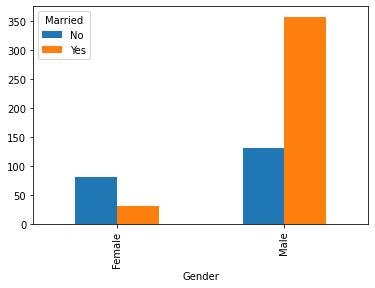

In [50]:
pd.crosstab(train.Gender,train.Married).plot(kind='bar')

#### Pie Chart

<AxesSubplot:ylabel='Gender'>

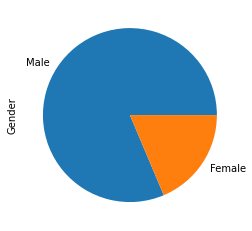

In [51]:
train['Gender'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Education'>

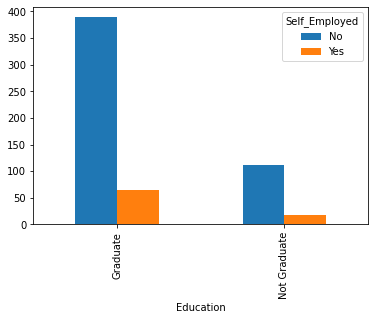

In [52]:
pd.crosstab(train.Education,train.Self_Employed).plot(kind='bar')

<AxesSubplot:ylabel='Education'>

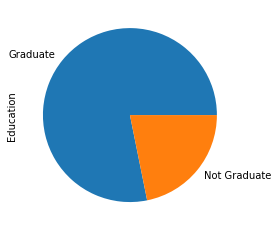

In [53]:
train['Education'].value_counts().plot(kind='pie')

### Histogram Plot

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([604.,   7.,   1.,   2.]),
 array([  150. , 20362.5, 40575. , 60787.5, 81000. ]),
 <BarContainer object of 4 artists>)

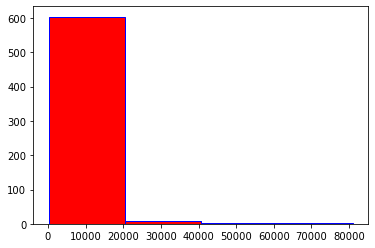

In [55]:
plt.hist(train['ApplicantIncome'],facecolor ="red",edgecolor ="blue",bins =4)
#creates histogram with 5bins and colours filled init.

(array([607.,   3.,   2.,   0.,   2.]),
 array([    0. ,  8333.4, 16666.8, 25000.2, 33333.6, 41667. ]),
 <BarContainer object of 5 artists>)

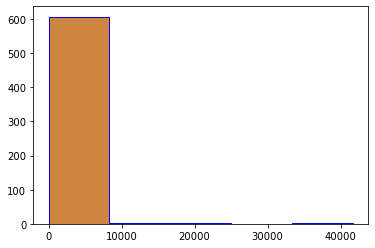

In [56]:
plt.hist(train['CoapplicantIncome'],facecolor ="peru",edgecolor ="blue",bins =5)
#creates histogram with 5bins and colours filled init. 

(array([382., 176.,  21.,   8.,   5.]),
 array([  9. , 147.2, 285.4, 423.6, 561.8, 700. ]),
 <BarContainer object of 5 artists>)

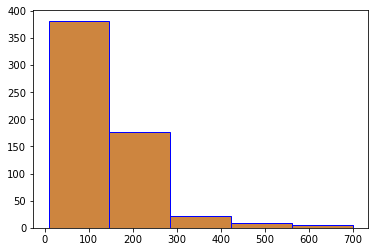

In [57]:
plt.hist(train['LoanAmount'],facecolor ="peru",edgecolor ="blue",bins =5)


(array([  9.,  47.,   4., 525.,  15.]),
 array([ 12. , 105.6, 199.2, 292.8, 386.4, 480. ]),
 <BarContainer object of 5 artists>)

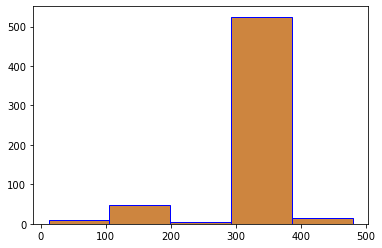

In [58]:
plt.hist(train['Loan_Amount_Term'],facecolor ="peru",edgecolor ="blue",bins =5)

C:\Users\Vijay Guled\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

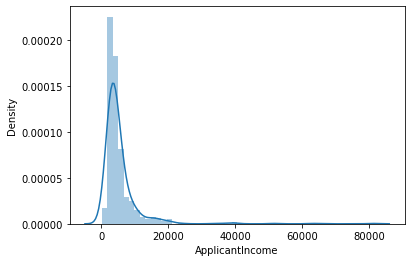

In [59]:
sns.distplot(train.ApplicantIncome,kde=True)

### Indeplendent variable(Categorical) visualization by using bar plot

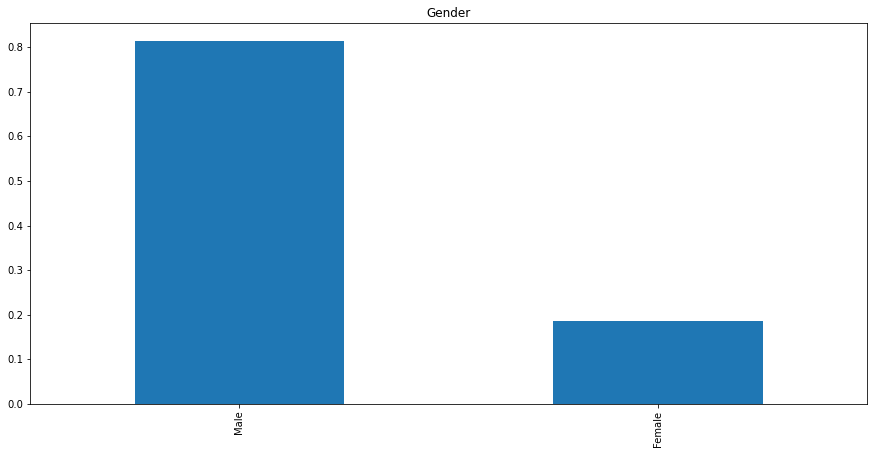

In [60]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,7), title='Gender')
plt.show()

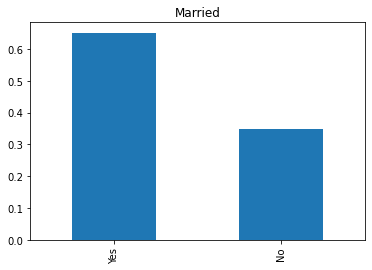

In [61]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married')  
plt.show()       

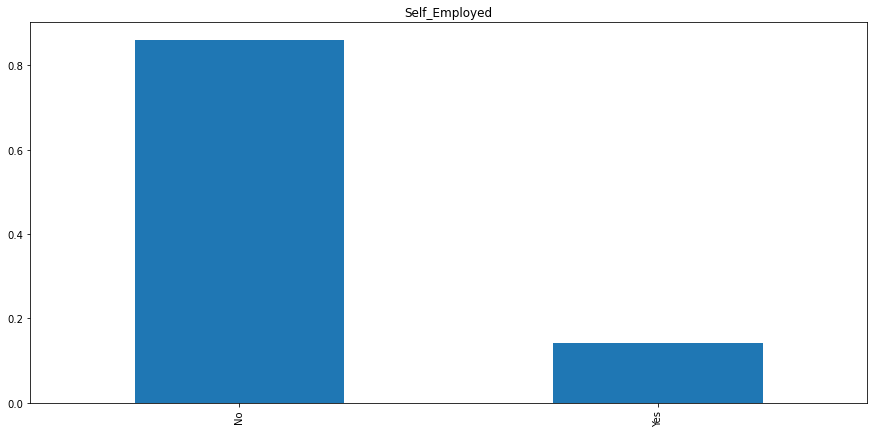

In [62]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(15,7), title='Self_Employed')
plt.show()

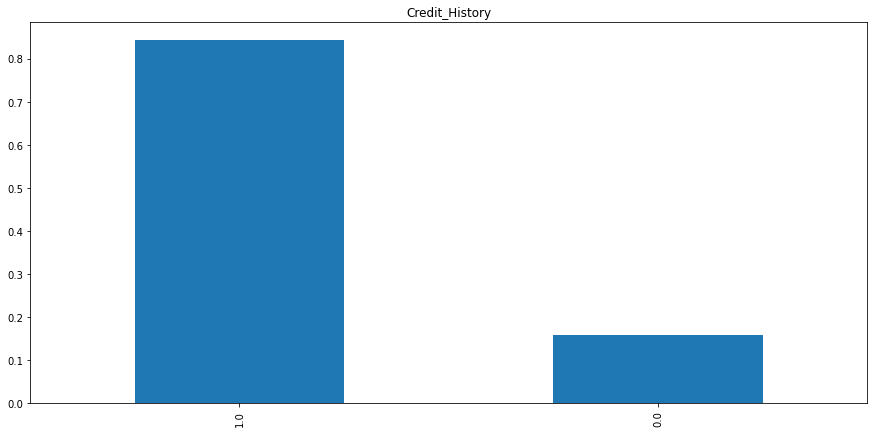

In [63]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(15,7), title='Credit_History')
plt.show()

### It can be inferred from the above bar plots that:
### 80% of applicants in the dataset are male.
### Around 65% of the applicants in the dataset are married.
### Around 15% of applicants in the dataset are self-employed.
### Around 85% of applicants have repaid their doubts.

## Independent Variable (Ordinal)

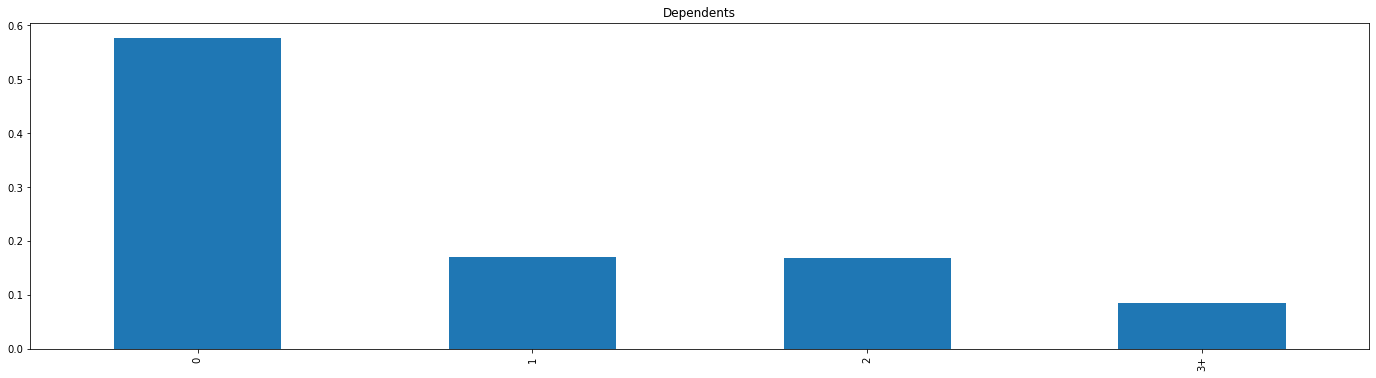

In [64]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()

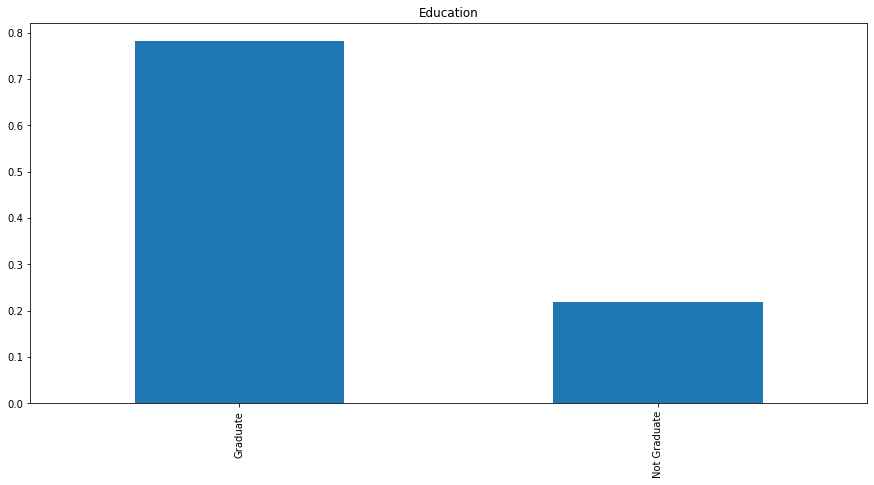

In [65]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(15,7), title='Education')
plt.show()

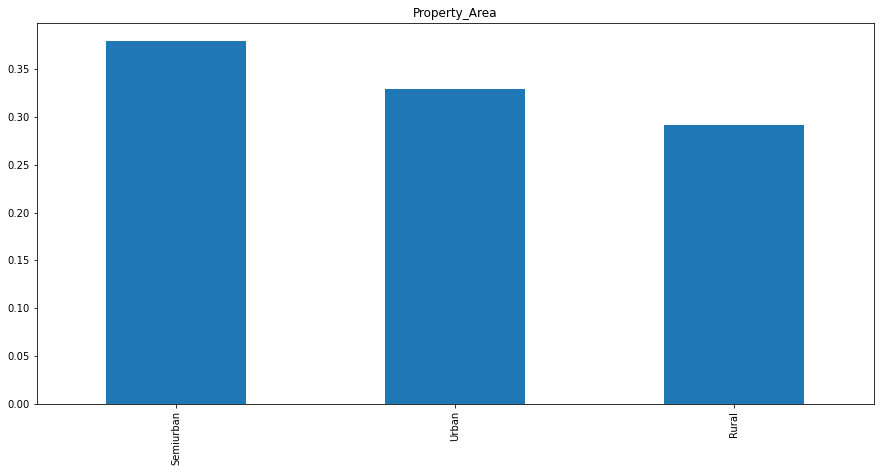

In [66]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(15,7), title='Property_Area')
plt.show()

### The following inferences can be made from the above bar plots:

### Most of the applicants don't have any dependents.
### Around 80% of the applicants are Graduate.
### Most of the applicants are from the Semiurban area

## Graphs for numerical  independent variables

C:\Users\Vijay Guled\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


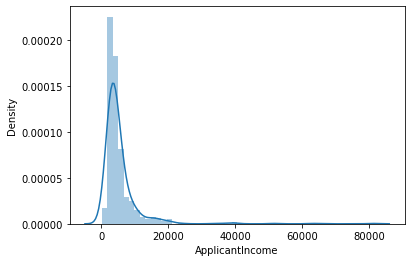

In [67]:
sns.distplot(train['ApplicantIncome'])
plt.show()

C:\Users\Vijay Guled\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


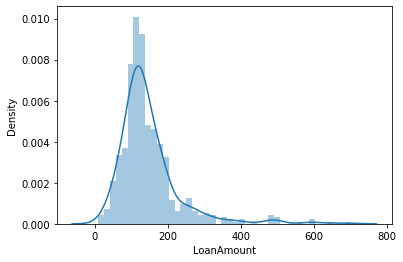

In [68]:
sns.distplot(train['LoanAmount'])
plt.show()

In [69]:
####It can be inferred that most of the data in the distribution of applicant income are towards the left which means 
#it is not normally distributed. 
##We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

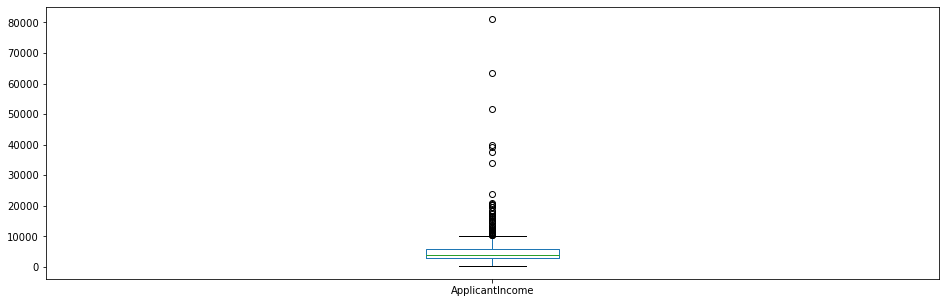

In [70]:
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

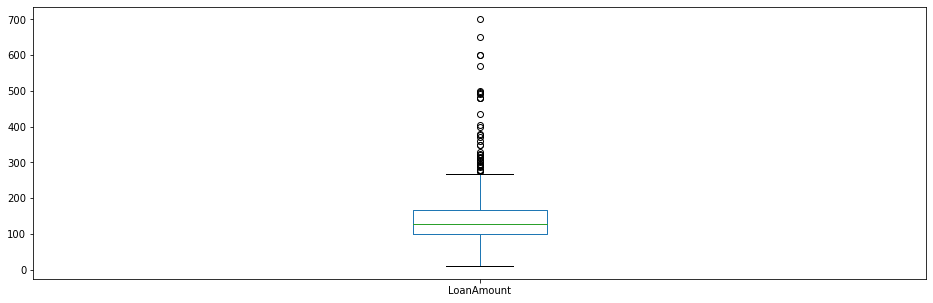

In [71]:
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [72]:
##The boxplot confirms the presence of a lot of outliers/extreme values. 
##This can be attributed to the income disparity in the society. Part of this can be driven by the fact that
#we are looking at people with different education levels. 
#Let us segregate them by Education.

Text(0.5, 0.98, '')

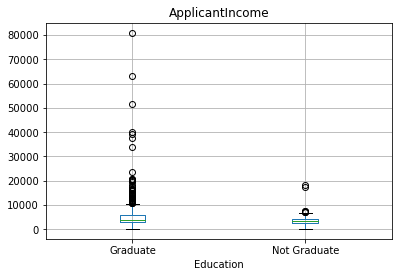

In [73]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

# We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

In [74]:
## CoapplicantIncome:Plot graph & distplot

C:\Users\Vijay Guled\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


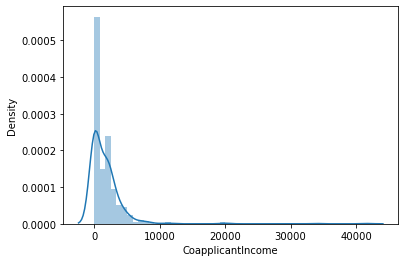

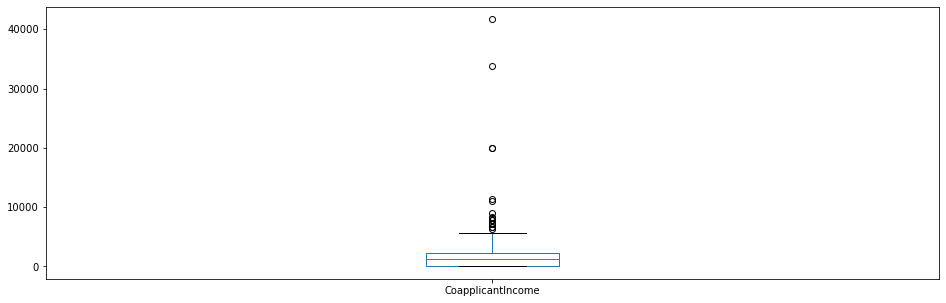

In [75]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

### We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

#####  Applicants with high incomes should have more chances of loan approval. Applicants who have repaid their previous debts should have higher chances of loan approval. Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high. Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval. Let’s try to test the above-mentioned hypotheses using bivariate analysis. After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

## Normalize can be set to True to print proportions instead of number

In [76]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

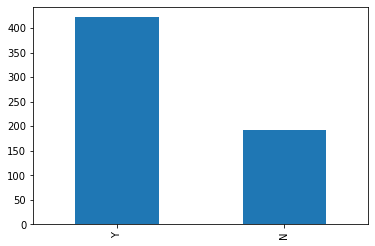

In [77]:
train['Loan_Status'].value_counts().plot.bar()

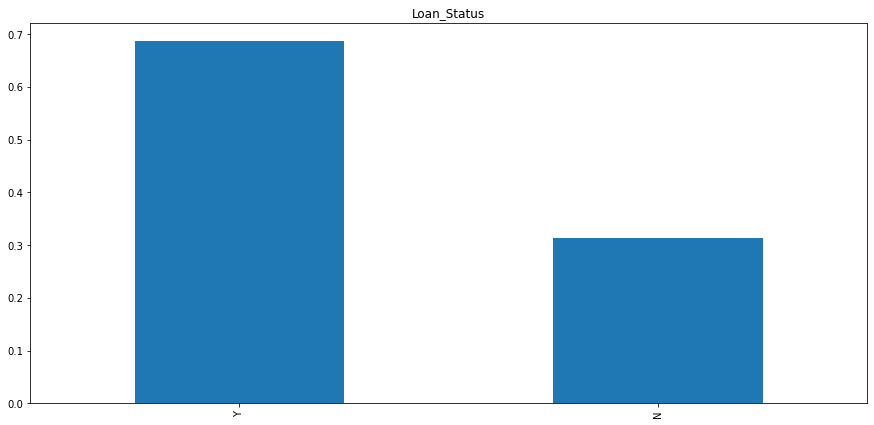

In [78]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(15,7), title='Loan_Status')
plt.show()

In [79]:
##Pairplot of train dataset

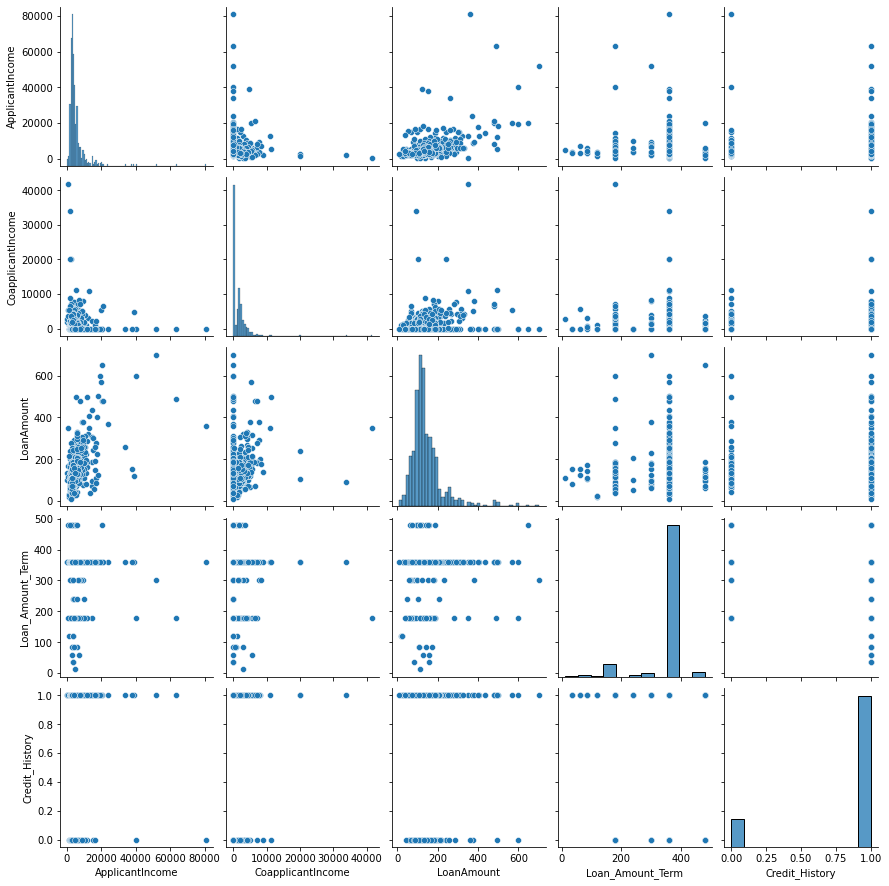

In [80]:
sns.pairplot(train)
plt.show()

## Categorical Independent Variable vs Target variable

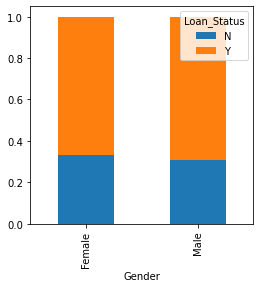

In [81]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

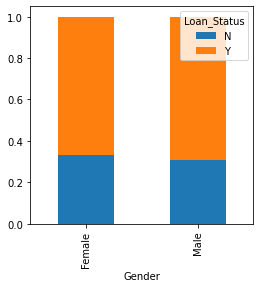

In [82]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()             

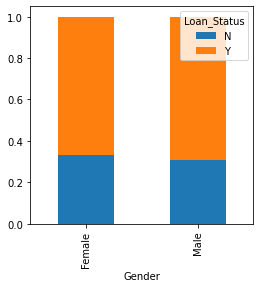

In [83]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

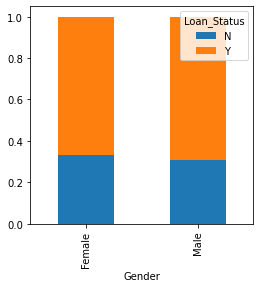

In [84]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

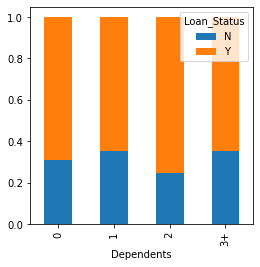

In [85]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


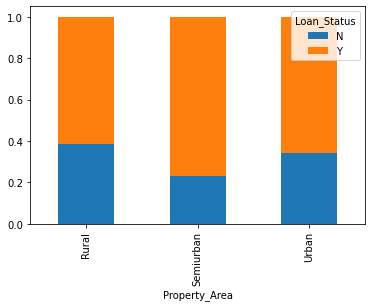

In [86]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

### It seems people with a credit history as 1 are more likely to get their loans approved.
### The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.
### Numerical Independent Variable vs Target Variable
### We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

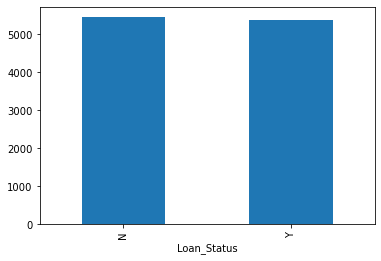

In [87]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

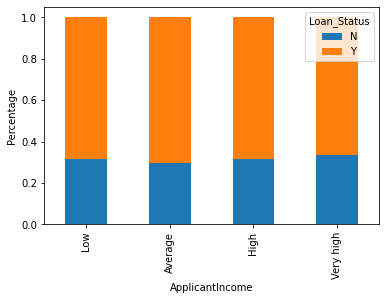

In [88]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')


Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

### It can be inferred that Applicant's income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant's income is high the chances of loan approval will also be high.

In [89]:
#We will analyze the co-applicant income and loan amount variable in a similar manner.

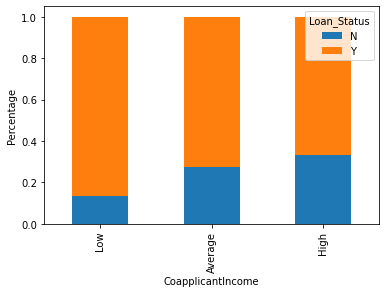

In [90]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

In [91]:
##Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

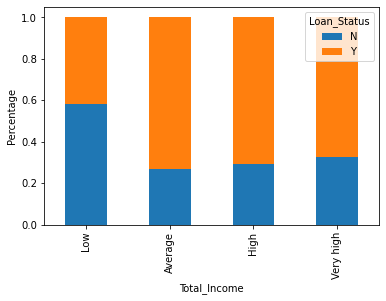

In [92]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

### Let’s visualize the Loan Amount variable.

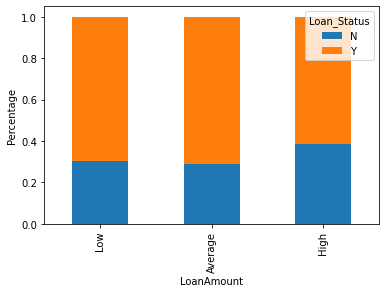

In [93]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

## It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.
## Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [94]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)


In [97]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

## will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.¶

<AxesSubplot:>

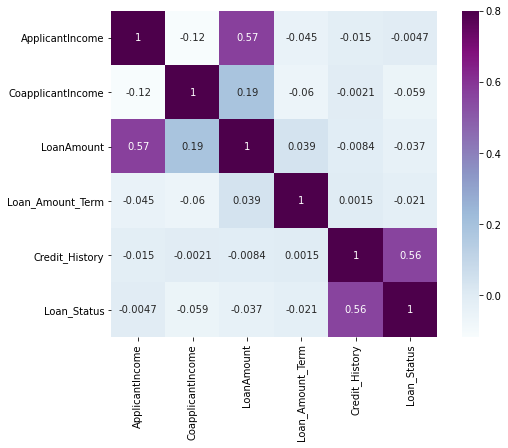

In [98]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

### Preprocessing of the dataset

In [99]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Finding null entry & impuatation technique

### For numerical variables: imputation using mean or median
### For categorical variables: imputation using mode

In [100]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [101]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())


In [102]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [103]:
##It can be seen that in the loan amount term variable, the value of 360 is repeating the most.
#So we will replace the missing values in this variable using the mode of this variable.

In [104]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [105]:
##We will use the median to fill the null values as earlier we saw that the loan amount has outliers
#so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [106]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [107]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [109]:
train.shape

(614, 13)

In [110]:
##As we can see that all the missing values have been filled in the test dataset.
#3Let’s fill all the missing values in the test dataset too with the same approach.

In [111]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [112]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [113]:
test.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Outlier Treatment

LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let’s examine what can happen to a data set with outliers

### Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation.


## Log Trasformation

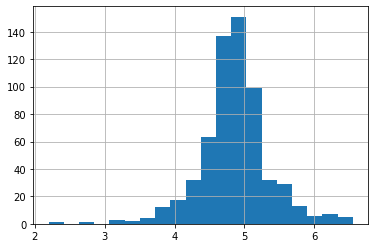

In [114]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])


# Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

# 1)Logistic Regression
# Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
# Logistic regression is an estimation of Logit function. The logit function is simply a log of odds in favor of the event.
# This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

In [115]:
###drop the Loan_ID variable as it does not have any effect on the loan status.

In [116]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [117]:
X = train.drop('Loan_Status',1)    ###target variable in a separate dataset
y = train.Loan_Status

### dummy variables for the categorical variables.

In [118]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [119]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,4.986426,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1


In [120]:
train.shape

(614, 22)

In [121]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1


In [122]:
test.shape

(367, 21)

In [123]:
###We will use the train_test_split function from sklearn to divide our train dataset. 
##So, first, let us import train_test_split.

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8162162162162162

# So our predictions are almost 82% accurate, i.e. we have identified 85% of the loan status correctly.

## Let’s make predictions for the test dataset

In [128]:
pred_test = model.predict(test)

In [129]:
from sklearn.model_selection import StratifiedKFold

## Now let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.

In [130]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {}' .format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

## The mean validation accuracy for this model turns out to be 0.80. Let us visualize the roc curve.

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### We got an auc value of 0.70

## Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features: 1) Total Income — As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan approval might also be high.

2) EMI — EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of the loan amount with respect to the loan amount term.

3) Balance Income — This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.



In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [ ]:
##Let’s check the distribution of Total Income.

In [ ]:
sns.distplot(train['Total_Income'])

#We can see it is shifted towards left, i.e., the distribution is right-skewed. 
#So, let’s take the log transformation to make the distribution normal.

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])


### Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

### Let’s check the distribution of the EMI variable.

In [ ]:
sns.distplot(train['EMI'])

In [ ]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])


#### Let us now drop the variables which we used to create these new features. The reason for doing this is, the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

### Model Building: Part II

In [ ]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

## Logistic Regression

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_data_index,test_data_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_data_index],X.loc[test_data_index]
 ytr,yvl = y[train_data_index],y[test_data_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

## Mean Validation Accuracy 0.759016393442623

## Decision Tree

In [ ]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

In [ ]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)